In [2]:
from Scripts_Murad import project_functions # This is called a relative import
df = project_functions.load_and_process("../../data/raw/BankCustomers.csv")
print(df.head(10))

   CLIENTNUM     Attrition_Flag  Age Gender  Dependent_count      Education  \
0  768805383  Existing Customer   45      M                3    High School   
1  818770008  Existing Customer   49      F                5       Graduate   
2  713982108  Existing Customer   51      M                3       Graduate   
3  709106358  Existing Customer   40      M                3     Uneducated   
4  713061558  Existing Customer   44      M                2       Graduate   
5  710930508  Existing Customer   37      M                3     Uneducated   
6  719661558  Existing Customer   48      M                2       Graduate   
7  710599683  Existing Customer   56      M                1        College   
8  712396908  Existing Customer   57      F                2       Graduate   
9  709967358  Existing Customer   48      M                4  Post-Graduate   

  Marital_Status          Income Card Type  Months_on_book  \
0        Married     $60K - $80K      Blue              39   
1     

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [4]:
df.describe(include=[np.number])

,CLIENTNUM,Age,Dependent_count,Months_on_book,Relationship Count,Months Inactive,Contacts_Count_12_mon,Credit Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,7.081000e+03,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,7.390919e+08,46.347691,2.337805,35.981359,3.819376,2.342607,2.454456,8492.773831,1167.501624,7325.272207,4394.299816,64.503319,0.282313
std,3.685244e+07,8.041225,1.291649,8.002609,1.544444,0.995104,1.104917,9126.072520,812.315606,9131.217585,3468.461606,23.809330,0.278731
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130105e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2498.000000,463.000000,1248.000000,2089.000000,44.000000,0.026000
50%,7.178438e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4287.000000,1282.000000,3250.000000,3831.000000,67.000000,0.186000
75%,7.732370e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10729.000000,1781.000000,9491.000000,4740.000000,80.000000,0.515000
max,8.282989e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,17995.000000,134.000000,0.999000


Text(0.5, 1.0, 'Education Level of Customers')

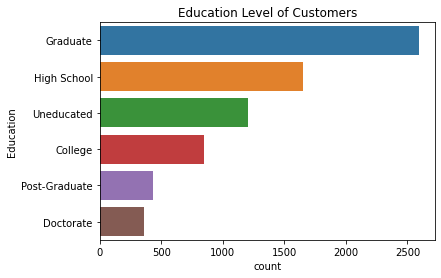

In [14]:
sns.countplot(y="Education",order=df["Education"].value_counts().index,data=df).set_title("Education Level of Customers")

### Info about attrition

Text(0.5, 1.0, 'Attrition based on gender')

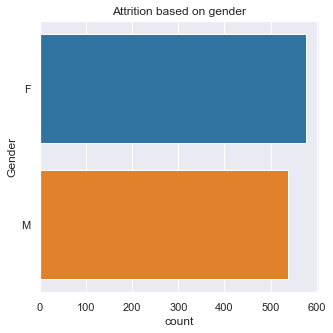

In [5]:
sns.set(rc={'figure.figsize':(5,5)}) #increase the size of the graph
attrited_rows = df.loc[df['Attrition_Flag'] == "Attrited Customer"]
sns.countplot(y='Gender', data=attrited_rows, palette='tab10').set_title('Attrition based on gender')


Female customers, attrite more than males, however the difference is not that big.

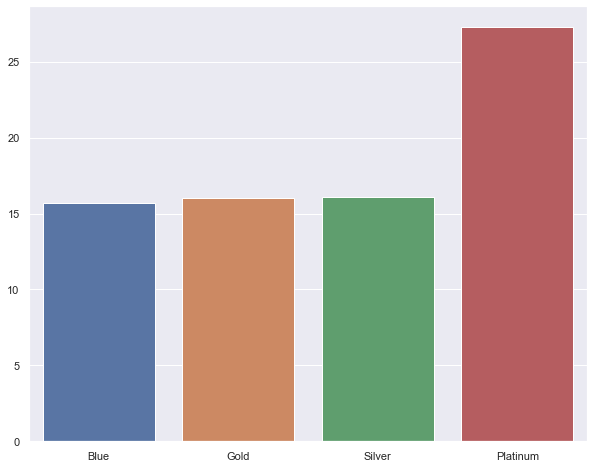

In [107]:
sns.set(rc={'figure.figsize':(10,8)}) #increase the size of the graph
percentages = []
# get the percentage of attrited  from the total number
for cardType in df["Card Type"].unique():
    percentages.append((len(attrited_rows[attrited_rows["Card Type"]==cardType])*100)/len(df[df["Card Type"]==cardType]))
cards = df["Card Type"].unique()
catp = sns.barplot(data=attrited_rows, y = percentages,
                   x=cards)


Platinium Card holders have a much higher chance of attrition.

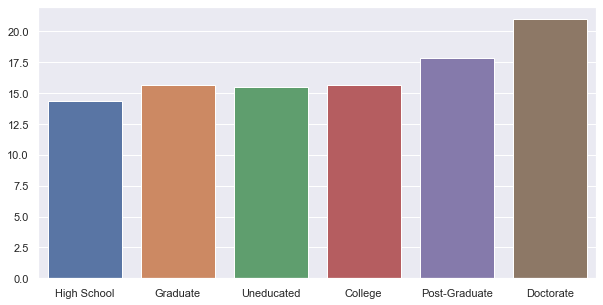

In [9]:
percentages = []
# get the percentage of attrited  from the total number
for education in df["Education"].unique():
    percentages.append((len(attrited_rows[attrited_rows["Education"]==education])*100)/len(df[df["Education"]==education]))
cards = df["Education"].unique()
catp = sns.barplot(data=attrited_rows, y = percentages,
                   x=cards)

Once again, we see the proportionally customers with PhD are more likely to attrite.

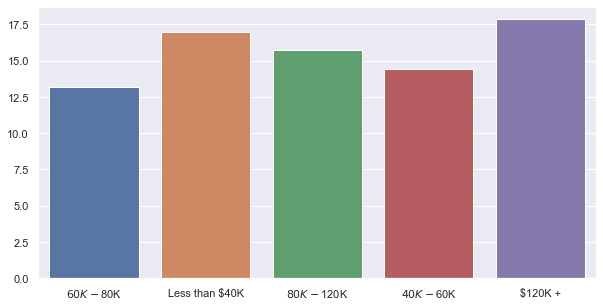

In [10]:
sns.set(rc={'figure.figsize':(10,5)})
percentages = []
# get the percentage of attrited  from the total number
for income in df["Income"].unique():
    percentages.append((len(attrited_rows[attrited_rows["Income"]==income])*100)/len(df[df["Income"]==income]))
cards = df["Income"].unique()
catp = sns.barplot(data=attrited_rows, y = percentages,
                   x=cards)